# Lending club data analysis and ML Project

## The Data

I will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Project Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), I will build a model that can predict wether or nor a borrower will pay back their loan.
The column that represent whether the borrower defaulted is 'loan status'

### Code structure
The first section is exploritory analysis on the relationships between the different variables of the data, especially the corrolation with the 'loan status' column which is the label that later will be used to create the predictions. <br>
The second section deals with missing data, whether filtering or replacing it as much as possible. <br>
The third section focuses on feature engineering to prepare the data for the ML model. <br>
In the forth section I build the ML model and compare it to the test data.



## Section 1: Exploritory analysis

### Understanding the data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

----
-----
Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>17</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>19</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>20</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>21</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>22</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>23</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>24</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>25</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [15]:
print(f'This Dataframe has {df.shape[0]} rows over {df.shape[1]} columns')

This Dataframe has 396030 rows over 27 columns


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [17]:
df.sample(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
11144,6000.0,36 months,13.98,205.01,C,C3,cosmetologist,10+ years,MORTGAGE,36000.0,...,7.0,1.0,2332.0,44.0,11.0,w,INDIVIDUAL,1.0,0.0,"969 Valencia Squares Suite 664\nYolandaton, CO..."
44014,5000.0,36 months,6.89,154.14,A,A3,Construction Worker,7 years,OWN,90000.0,...,12.0,0.0,8673.0,38.5,24.0,f,INDIVIDUAL,5.0,0.0,"290 Russell Point\nPort Melissaton, DE 00813"
256842,15000.0,36 months,12.99,505.34,B,B4,Film Buyer,10+ years,MORTGAGE,78000.0,...,10.0,0.0,24945.0,82.3,18.0,w,INDIVIDUAL,2.0,0.0,"693 Nicolas Field Apt. 664\nLake Marybury, MI ..."


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


As we can see in the following vizualisation, our data is not balanced in terms of the prediction label, as there are much more those who repaid their loans than those who didnt. This means that metrics such as recall and percision will be important more than the general accuracy of the model.

### visualizations

Text(0.5, 0, 'Loan status')

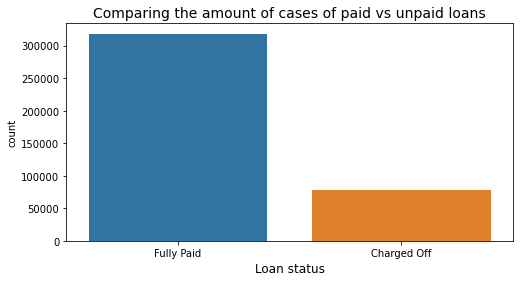

In [19]:
plt.figure(figsize = (8,4))
sns.countplot(data=df,x='loan_status')
plt.title('Comparing the amount of cases of paid vs unpaid loans',fontsize=14)
plt.xlabel('Loan status',fontsize=12)

Since the label column is currently a string column, we will replace it with a dummy variable. For simplicity, the exploritory analysis will still use the former column, but later we will switch to the new column

In [20]:
df['loan_repaid'] = np.where(df['loan_status'] == 'Fully Paid',1,0)

we can see that there is a high corrolation between loan amount and installment. from checking the description, it looks like installment is some sort of an adaptation of the same variable. 

Text(0.5, 1.0, 'Corrolation between numeric variables')

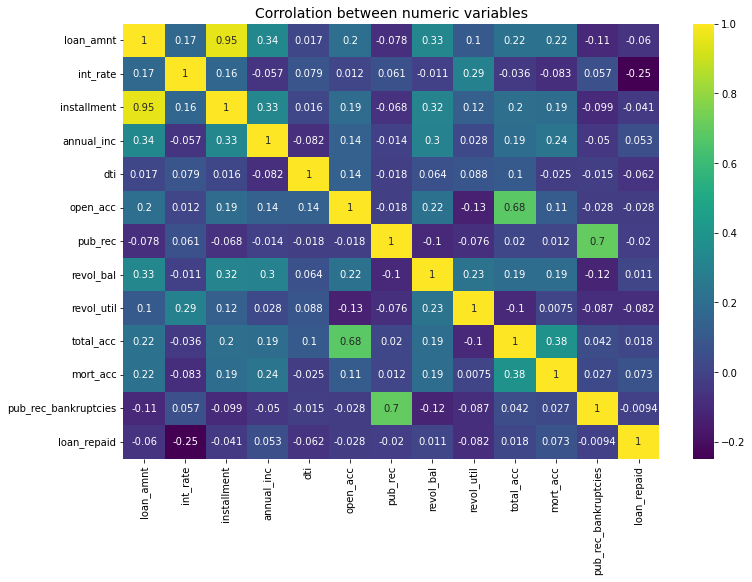

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),cmap='viridis',annot=True)
plt.title('Corrolation between numeric variables',fontsize=14)

From this visualization we can see that perhaps there is a slight corrolation between the loan amount and the status, since the distribution for unpaid loans is a bit flatter, thus more spread on higher amounts.

Text(0.5, 0, 'Loan amount')

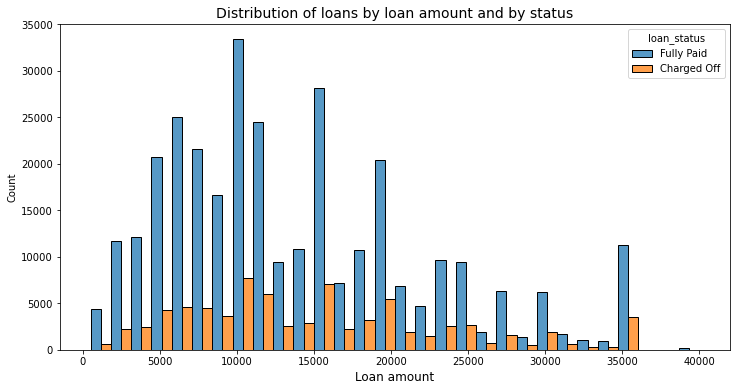

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='loan_amnt',bins=30,hue='loan_status',multiple='dodge')
plt.title('Distribution of loans by loan amount and by status',fontsize=14)
plt.xlabel('Loan amount',fontsize=12)

Unpaid loans are slightly higher as we can see in the following visualization and summary table.

Text(0, 0.5, 'Loan amount')

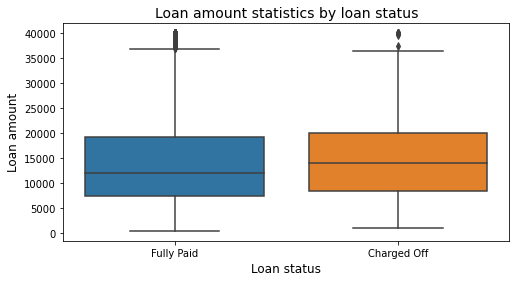

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='loan_status',y='loan_amnt')
plt.title('Loan amount statistics by loan status',fontsize=14)
plt.xlabel('Loan status',fontsize=12)
plt.ylabel('Loan amount',fontsize=12)

In [24]:
df.groupby('loan_status')['loan_amnt'].describe().T

loan_status,Charged Off,Fully Paid
count,77673.000000,318357.000000
mean,15126.300967,13866.878771
std,8505.090557,8302.319699
min,1000.000000,500.000000
25%,8525.000000,7500.000000
50%,14000.000000,12000.000000
75%,20000.000000,19225.000000
max,40000.000000,40000.000000


Checking if there is a corrolation between the loan status and the grade the loan receieved when it was issued.
As we can see, the rate of default increases as the grade of the loan is lower.

Text(0.5, 0, 'Sub grade')

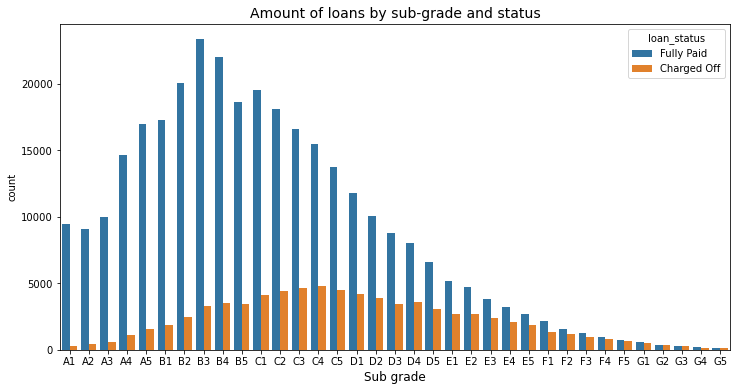

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='sub_grade',order=sorted(df['sub_grade'].unique()),hue='loan_status')
plt.title('Amount of loans by sub-grade and status',fontsize=14)
plt.xlabel('Sub grade',fontsize=12)

Zoom-in on the lower grades - F and G.
We can see that in most cases the rate of default is almost 50%!

Text(0.5, 0, 'Sub grade')

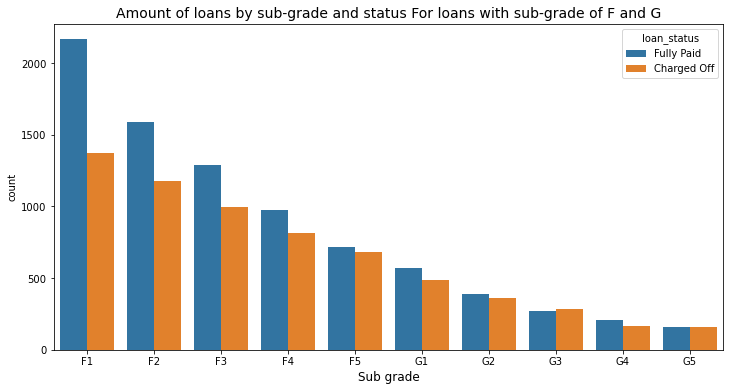

In [26]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
subgrade_order = sorted(f_and_g['sub_grade'].unique())

plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')
plt.title('Amount of loans by sub-grade and status For loans with sub-grade of F and G',fontsize=14)
plt.xlabel('Sub grade',fontsize=12)

## Section 2: Missing Data

First, lets identify the columns with missing data as percentage of total observations.
We can see that the columns with most missing data are mort_acc, emp_title, emp_length, and some other columns with lesser amounts of missing data.
In general, the strategy with dealing with missing data is either discard it, recode it into a dummy variable, or fill it using other columns, depending on the attributes of the specific column and type of missing data.

In [27]:
(df.isnull().sum()/len(df)).sort_values()*100

loan_amnt               0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
dti                     0.000000
address                 0.000000
loan_status             0.000000
purpose                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
term                    0.000000
issue_d                 0.000000
loan_repaid             0.000000
revol_util              0.069692
pub_rec_bankruptcies    0.135091
title                   0.443148
emp_length              4.621115
emp_title               5.789208
mort_acc                9.543469
dtype: float64

First, I shall examine the 'emp_title' column. According to the description, this column contains The job title supplied by the Borrower when applying for the loan.
Realistically there are too many unique job titles to try to convert this to a dummy variable feature.
Therefore I shall remove this column

In [28]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [29]:
df.drop('emp_title',axis=1,inplace=True)

Next, I shall examine the 'emp_length' column. According to the description, this column contains Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years

In [30]:
#sorting the column for later use
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

First let's look at the distribution of this variable. It seems the distribution is similar for all cases where the length is 9 or lower, while 10 years and above is the most common. 

<AxesSubplot:xlabel='emp_length', ylabel='count'>

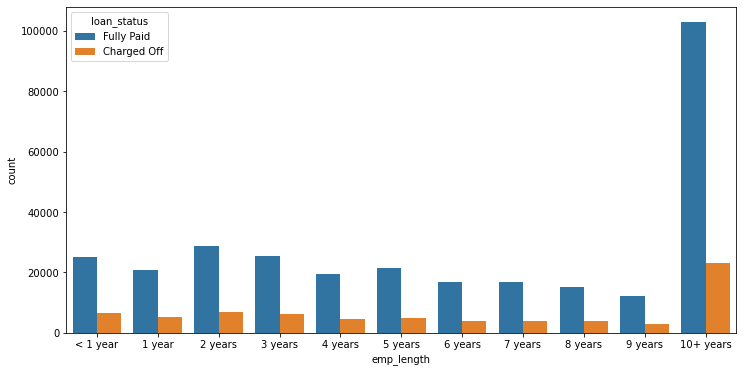

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='emp_length',hue='loan_status',order=emp_length_order)

I examine whether this column has any corrolation with the loan status column. Calculating the loans paid rate by employment length shows that there is hardly no variance. Therefore it is reasonable to remove the column.

Text(0, 0.5, 'Loan repayment rate')

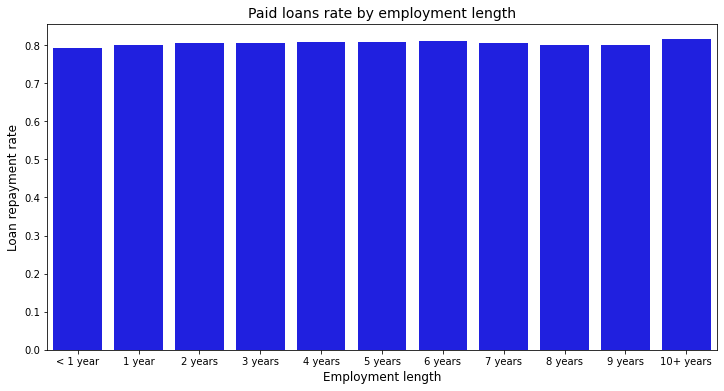

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby('emp_length',as_index=False).mean()[['emp_length','loan_repaid']],
            x='emp_length',y='loan_repaid',order=emp_length_order,color='blue')
plt.title('Paid loans rate by employment length',fontsize=14)
plt.xlabel('Employment length',fontsize=12)
plt.ylabel('Loan repayment rate',fontsize=12)

In [33]:
df.drop('emp_length',axis=1,inplace=True)

Next, I examine the title column. According to the description, the title column is The loan title provided by the borrower.
This is very similar to the purpose column which is A category provided by the borrower for the loan request.
The following table shows this similarity.
Therefore we can remove this column.

In [34]:
df[['purpose','title']].head(10)

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
5,debt_consolidation,Debt consolidation
6,home_improvement,Home improvement
7,credit_card,No More Credit Cards
8,debt_consolidation,Debt consolidation
9,debt_consolidation,Debt Consolidation


In [35]:
df.drop('title',axis=1,inplace=True)

The column with the highest amount of missing data is mort_acc, which according to the description is Number of mortgage accounts. Since we dont want to remove 10% of our data, lets see if we can fill this column using other columns.

In [36]:
df.corr()['mort_acc'].sort_values()[:-1]

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

Since mort_acc is most corrolated with 'total_acc', we will use this column to fill in the missing data using the average value of mort_acc based on the 'total_acc'

In [37]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [38]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

The other columns with missing data are revol_util and the pub_rec_bankruptcies, but they account for less than 0.5% of the total data. Therefore I will just remove these columns.

In [39]:
df.dropna(inplace=True)

### Section 3: Categorical Variables and Dummy Variables

for all the non-numeric columns, I test whether the best solution is to use them as dummy variables or to remove them

In [40]:
#list of non-numeric columns
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

The 'term' column has only two values: 36 and 60. which represents the duration of the loan. While it is possible to just turn it into a dummy variable, there is no herm with just turn it into a numeric column with 2 values.

In [41]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [42]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

The 'grade' column is unecessary since we have the 'sub-grade' column.

In [43]:
df.drop('grade',axis=1,inplace=True)

the 'home_ownership' could become a dummy variable, however it is recommended to combine some of it's answers. Specifically, the 'None' and 'Any' which have almost no observations would be combined with the 'Other'

In [44]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [45]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

The 'address' column contains the borrowers adress, state and zipcode in the US. we can extract the zipcode and use it as a dummy vairable, since there are only 10 possible zip codes.

In [46]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [47]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [61]:
df.drop('address',axis=1,inplace=True)

now I turn all those columns into dummy variables, and remove the original ones

In [45]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose','sub_grade','home_ownership','zip_code']],drop_first=True)
df.drop(['verification_status', 'application_type','initial_list_status','purpose','sub_grade','home_ownership','zip_code'],axis=1,inplace=True)
df = pd.concat([df,dummies],axis=1)

The issue_d column contains the month which the loan was founded. This would be data leakage, since we wouldn't know beforehand whether or not a loan would be issued when using the model, so in theory we wouldn't have an issue_date.
Therefore I remove the column.

In [46]:
df.drop('issue_d',axis=1,inplace=True)

The earliest_cr_line column appears to be a historical time stamp feature. For simplicity, I extract the year and use it as a feature while removing the original column.

In [48]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [49]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df.drop('earliest_cr_line',axis=1,inplace=True)

Now the only non-numeric column left is 'loan status'. Since I have already created the 'loan repaid' column,
I can remove the original.
Now I have a dataset that is ready for the ML model.

In [50]:
df.drop('loan_status',axis=1,inplace=True)

### Section 4: Building the ML model

In [56]:
from sklearn.model_selection import train_test_split

In order to save time on training, I only use a sample of the dataset.

In [62]:
df_sample = df.sample(frac=0.1,random_state=101)

In [63]:
X = df_sample.drop('loan_repaid',axis=1).values
y = df_sample['loan_repaid'].values

I create a test/train split with a test size of 20% of the entire data set.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

Now I normalize the data. Since i don't want data leakge from the test set so I only fit on the X_train data

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
X_train = scaler.fit_transform(X_train)

In [68]:
X_test = scaler.transform(X_test)

Creating the Model

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

I create a model with an input layer with 78 neurons (same as the amount of features), two hidden layers with decreasing amounts of neurons of about half, and 1 output layer.
In order to prevent overfitting, the model contains a dropout rate of 20%. 
Since the label is a dummy variable, I will use the binary_crossentropy as my loss function and the sigmoid function as my activation function since it converts results to binary values.

In [70]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [71]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
124/124 [==============================] - 2s 6ms/step - loss: 0.4935 - val_loss: 0.3750
Epoch 2/25
124/124 [==============================] - 1s 5ms/step - loss: 0.3455 - val_loss: 0.2917
Epoch 3/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2939 - val_loss: 0.2785
Epoch 4/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2828 - val_loss: 0.2759
Epoch 5/25
124/124 [==============================] - 1s 4ms/step - loss: 0.2758 - val_loss: 0.2768
Epoch 6/25
124/124 [==============================] - 1s 6ms/step - loss: 0.2728 - val_loss: 0.2729
Epoch 7/25
124/124 [==============================] - 1s 6ms/step - loss: 0.2712 - val_loss: 0.2720
Epoch 8/25
124/124 [==============================] - 1s 6ms/step - loss: 0.2692 - val_loss: 0.2719
Epoch 9/25
124/124 [==============================] - 1s 6ms/step - loss: 0.2670 - val_loss: 0.2716
Epoch 10/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2665 - val_loss: 0.2705

Evaluating Model Performance.
we can see that by the 20th epoch we are begining to overfit the model.

<AxesSubplot:>

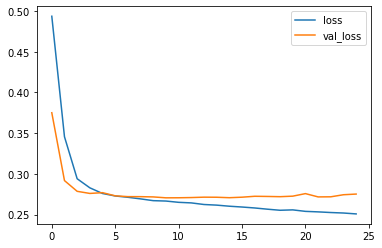

In [72]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

Lets see the evaluation metrics of this model using a classification_report

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

As we can see in the calisification report, the model is not very good at the recall rate for those who dont repay their loan.

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.47      0.61      1570
           1       0.88      0.98      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.88      0.73      0.77      7905
weighted avg       0.88      0.88      0.87      7905

